In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

\begin{equation}
    x^{t+1} =  \begin{pmatrix}
                x_1^{t+1}\\
                x_2^{t+1}\\
                x_3^{t+1}\\
                \end{pmatrix} = f(x^{t}, u^{t}) = \begin{pmatrix}
                x_1^{t} + u^{t}_1cos(x_3^{t})\delta_t\\
                x_2^{t} + u^{t}_1sin(x_3^{t})\delta_t\\
                x_3^{t} + u_2^{t}\delta_t\\
                \end{pmatrix}
\end{equation}

\begin{equation}
    A = \nabla_xf =  \begin{pmatrix}1&0&-u_1sin(x_3)\delta_t\\
                    0&1&u_1cos(x_3)\delta_t\\
                    0&0&1\\ \end{pmatrix}
\end{equation}

\begin{equation}
    B = \nabla_uf =  \begin{pmatrix} cos(x_3)\delta_t&0\\
                    sin(x_3)\delta_t&0\\
                    0&\delta_t \end{pmatrix}
\end{equation}

In [2]:
class Unicycle:
    def __init__(self, x=None,max_linear_velocity=2, max_angular_velocity=np.pi/3):
        if x is None:
            x = np.zeros(3)
        self.x = x
        self.max_linear_velocity = max_linear_velocity
        self.max_angular_velocity = max_angular_velocity 
    
    def f(self, u, x=None, dt=0.1, save_x=True):
        if x is None:
            x = self.x
            
        # clip controls
        u[0] = np.clip(u[0],-self.max_linear_velocity,self.max_linear_velocity)
        u[1] = np.clip(u[1],-self.max_angular_velocity,self.max_angular_velocity)
        
        
        x_prime = x.copy()
        x_prime[0] = x[0] + u[0]*np.cos(x[2])*dt
        x_prime[1] = x[1] + u[0]*np.sin(x[2])*dt
        x_prime[2] = x[2] + u[1]*dt
        
        if save_x:
            self.x = x_prime
        return x_prime
    
    def getA(self, u, x=None, dt=0.1):
        if x is None:
            x = self.x
        
        A = np.eye(3)
        A[0,2] = -u[0]*np.sin(x[2])*dt
        A[1,2] = u[0]*np.cos(x[2])*dt
        
        return A
        
    def getB(self, x=None, dt=0.1):
        if x is None:
            x = self.x
            
        B = np.zeros((3,2))
        B[0,0] = np.cos(x[2])*dt
        B[1,0] = np.sin(x[2])*dt
        B[2,1] = dt
        # B = ...
        
        return B
        
    def plot(self, x=None, ax=None):
        if x is None:
            x = self.x
            
        if ax is None:
            ax = plt
            
        # function to calculate transformation of unicycle reference frame
        get_T = lambda x, y, theta: np.array([[np.cos(theta),-np.sin(theta), x], [np.sin(theta),np.cos(theta), y], [0,0,0]])
        
        # function to get point from unicycle reference frame to world one
        def get_point(T, x,y):
            x,y,_ = T@(np.array([[x,y,1]]).T).reshape(-1)
            return x,y

        x,y,theta = x
        T = get_T(x,y,theta)    
        points = [(0.1,0),(0,-0.05),(0,0.05),(0.1,0)]
        points = [get_point(T,*p) for p in points]
        ax.plot([p[0] for p in points], [p[1] for p in points], color='red')


In [3]:
unicycle = Unicycle()
unicycle.x

array([0., 0., 0.])

In [4]:
u = np.array([1,np.pi/3])

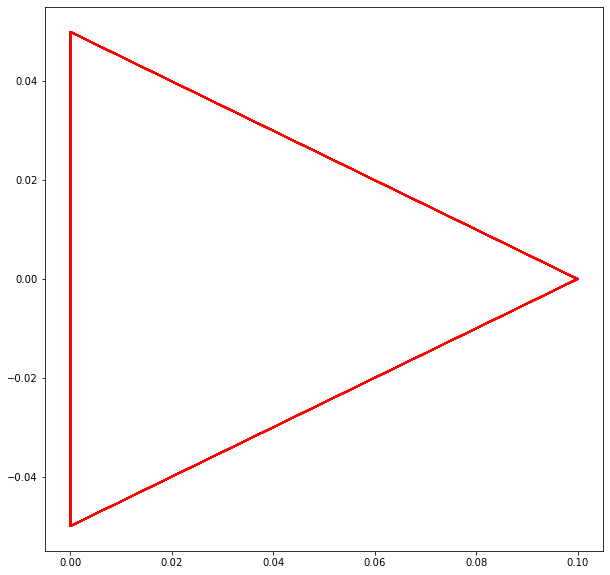

In [5]:
plt.subplots(figsize=(10,10))
for i in range(100):
    unicycle.plot()
    unicycle.f(u)
    
plt.show()